In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

In [2]:
# Load Auto dataset (assuming Auto.csv is uploaded)
auto = pd.read_csv("Auto.csv")

# ========== (a) Create binary variable mpg01 ==========
median_mpg = auto['mpg'].median()
auto['mpg01'] = (auto['mpg'] > median_mpg).astype(int)

c:\Users\dkkdk\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


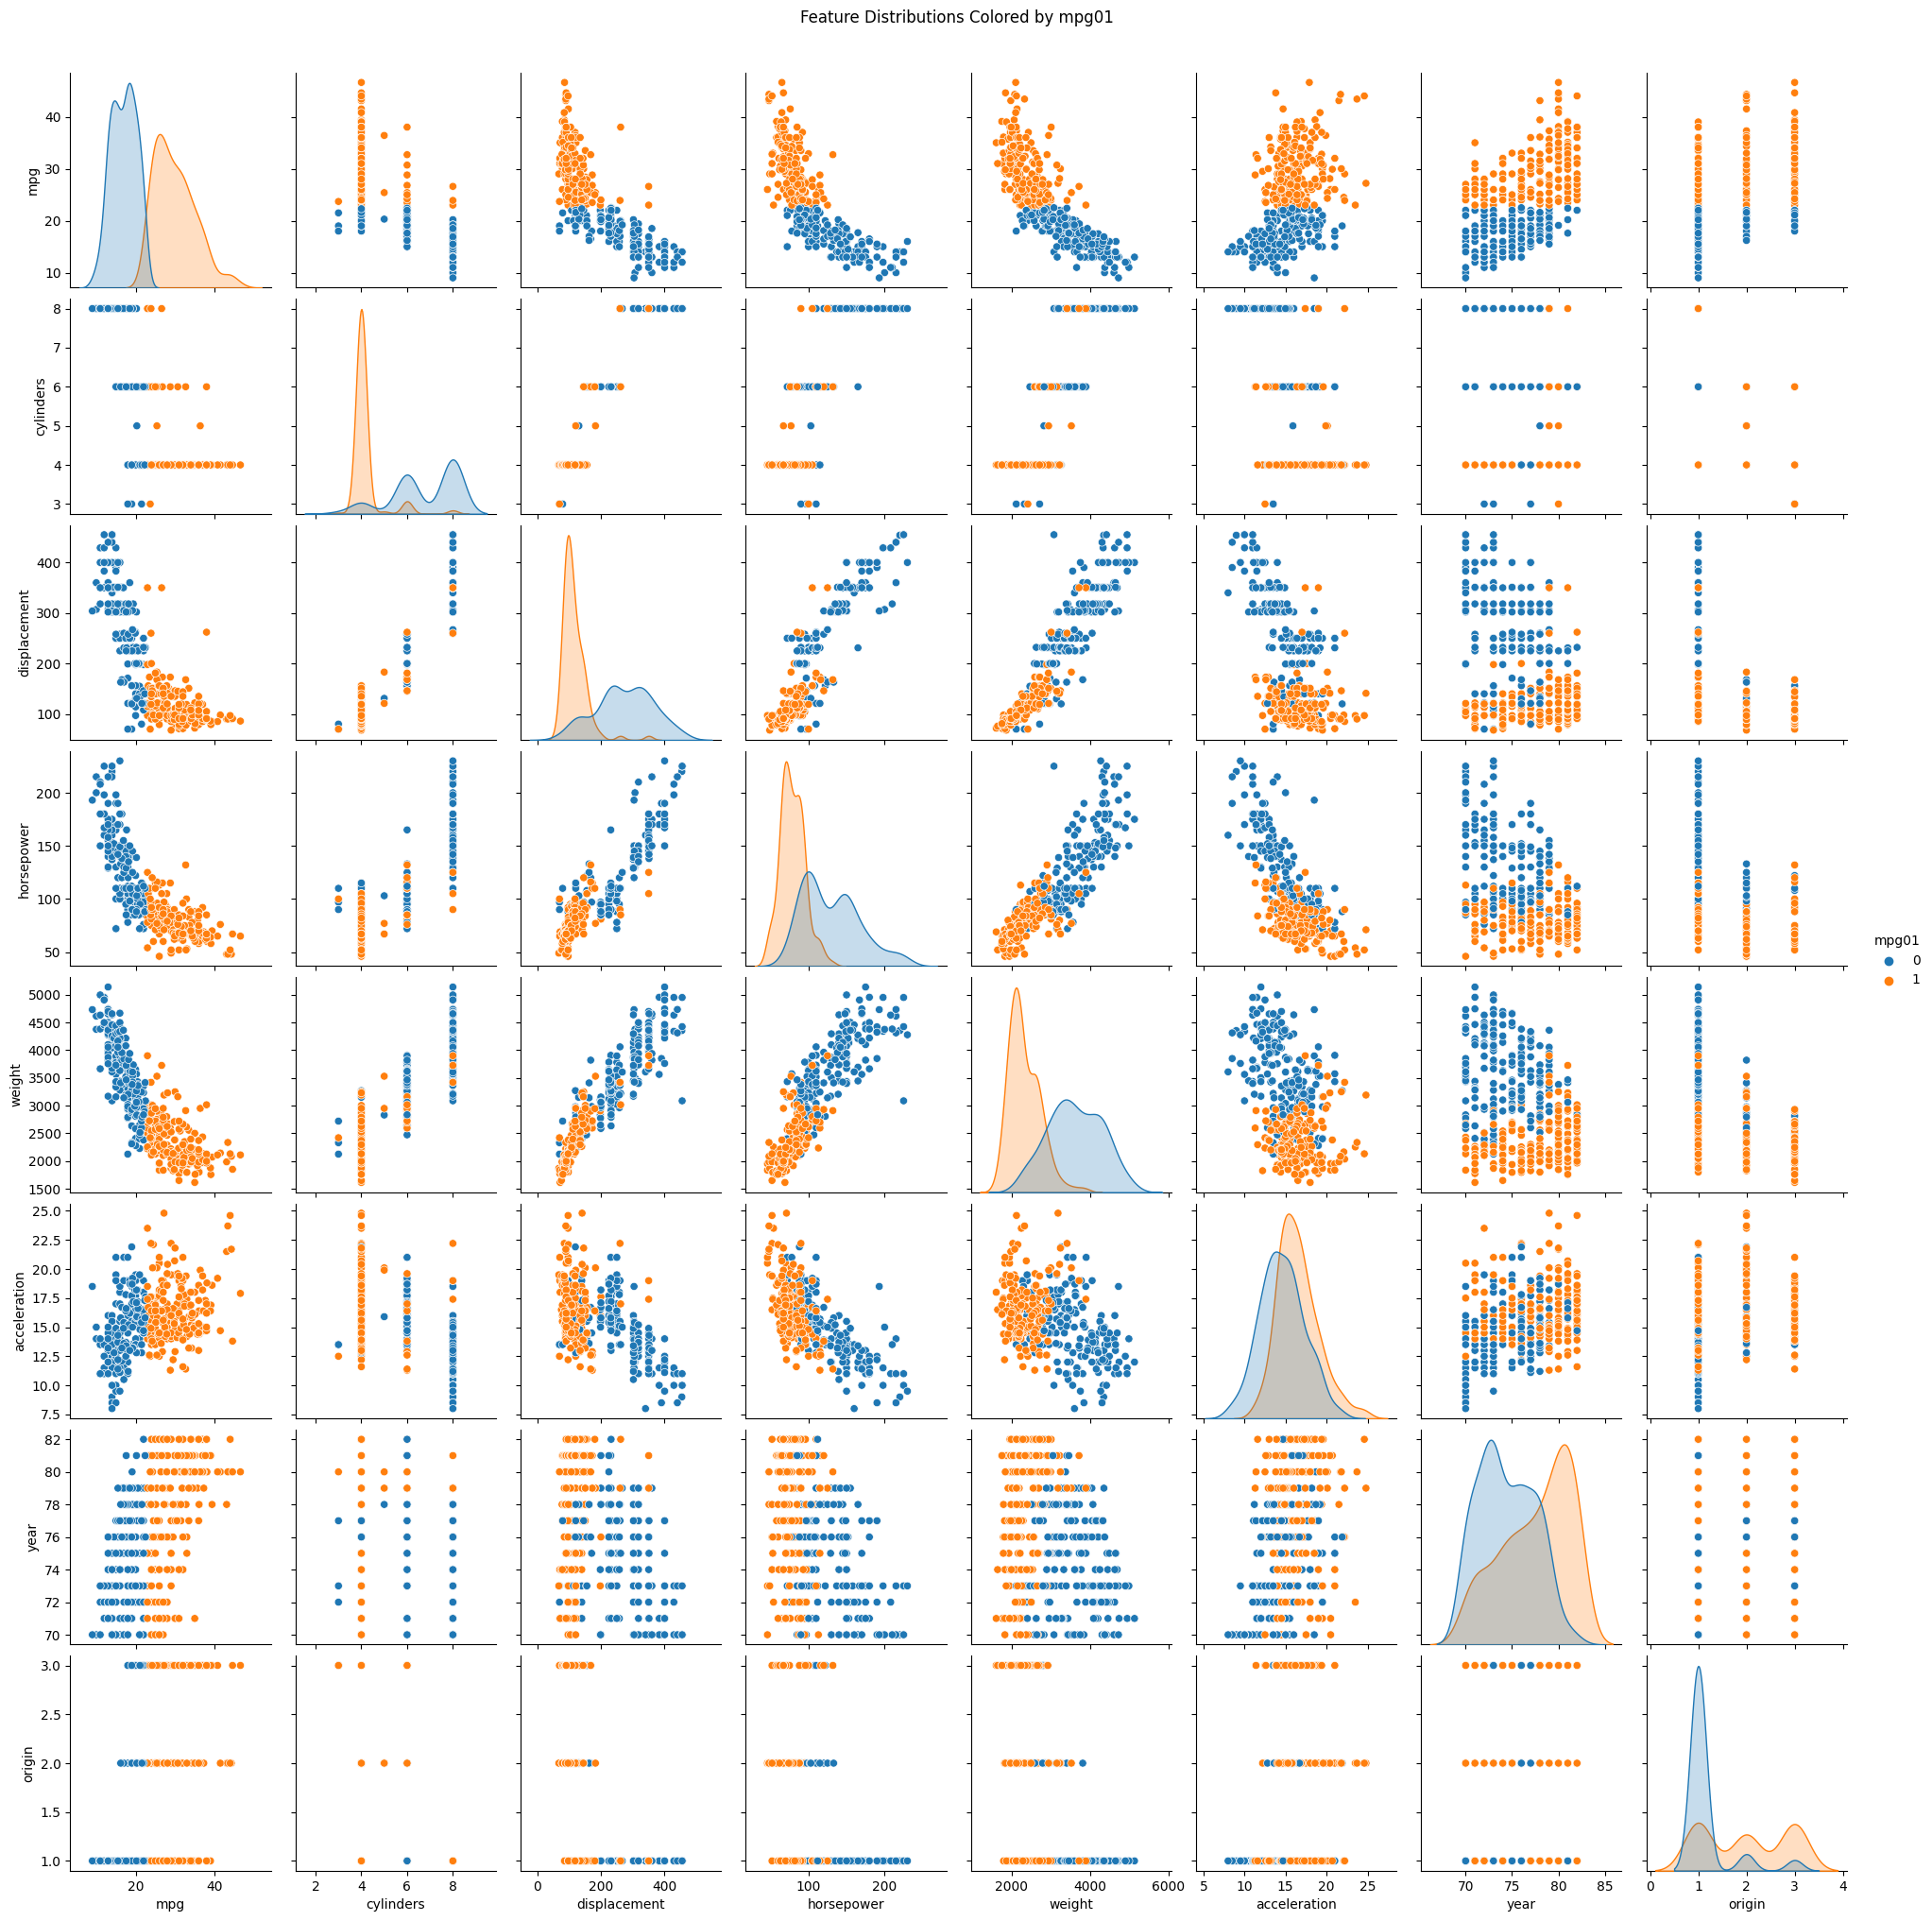

Correlation with mpg01:
 mpg01           1.000000
mpg             0.836939
origin          0.513698
year            0.429904
acceleration    0.346822
horsepower     -0.667053
displacement   -0.753477
weight         -0.757757
cylinders      -0.759194
Name: mpg01, dtype: float64


In [3]:
# ========== (b) Graphical exploration ==========
# Drop non-numeric 'name' column
auto_numeric = auto.drop(columns=['name'])

# Pairplot to explore relation with mpg01
sns.pairplot(auto_numeric, hue='mpg01')
plt.suptitle('Feature Distributions Colored by mpg01', y=1.02)
plt.show()

# Compute correlation matrix
correlation = auto_numeric.corr()
print("Correlation with mpg01:\n", correlation['mpg01'].sort_values(ascending=False))

In [4]:
# ========== (c) Logistic regression with selected features ==========
# Based on visual and correlation analysis, use 'displacement', 'horsepower', 'weight', 'acceleration'
features_c = ['displacement', 'horsepower', 'weight', 'acceleration']
X = auto[features_c]
y = auto['mpg01']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg_c = LogisticRegression(max_iter=1000)
log_reg_c.fit(X_train, y_train)
y_pred_c = log_reg_c.predict(X_test)
test_error_c = 1 - accuracy_score(y_test, y_pred_c)
print("Test error (c):", round(test_error_c, 3))

Test error (c): 0.144


In [5]:
# ========== (d) Logistic regression with all numerical predictors ==========
features_d = auto.drop(columns=['mpg01', 'mpg', 'name']).columns  # exclude target and non-numeric
X_all = auto[features_d]
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y, test_size=0.3, random_state=42)

log_reg_d = LogisticRegression(max_iter=1000)
log_reg_d.fit(X_train_all, y_train_all)
y_pred_d = log_reg_d.predict(X_test_all)
test_error_d = 1 - accuracy_score(y_test_all, y_pred_d)
print("Test error (d):", round(test_error_d, 3))

Test error (d): 0.127


In [6]:
# ========== (e) Statistically significant variables using statsmodels ==========
X_sm = sm.add_constant(X_all)
logit_model = sm.Logit(y, X_sm)
result = logit_model.fit()
print(result.summary())

# Exponentiated coefficient for one variable
odds_ratios = np.exp(result.params)
print("\nExponentiated coefficients (odds ratios):\n", odds_ratios)

# Pick one variable to interpret (example: weight)
interpret_var = 'weight'
print(f"\nInterpretation of '{interpret_var}':")
print(f"A one-unit increase in '{interpret_var}' multiplies the odds of mpg01=1 by {odds_ratios[interpret_var]:.3f}")

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  mpg01   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Sat, 19 Apr 2025   Pseudo R-squ.:                  0.7101
Time:                        20:43:24   Log-Likelihood:                -78.770
converged:                       True   LL-Null:                       -271.71
Covariance Type:            nonrobust   LLR p-value:                 2.531e-79
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.1549      5.764     -2.976      0.003     -28.452      -5.858
cylinders       -0.1626